cenas que faltam e quero pôr para ficar tudo completo e bonitinho:

- justificação melhorzinha para o uso da mediana nos nan numericals;
- justificaçao de o porquê de substituirmos os outliers pelos extremos e porqu enão os removemos ou mantemos
- o chat disse que podíamos, aliás devíamos meter os valores na variável pastel de nata todos iguais antes de os removermos, assim temos a certeza que só há mesmo um valor
- a correção daqueles errinhos que aparecem a meio é esta em vez do inplace = true: dataset_learn[i] = dataset_learn[i].fillna(median_value)

o que falta(obrigatório e essencial):
- para cada variavel numérica, adicionar boxplots antes e depois de tirar outliers. isto permite visualizar e provar o tratamentos dos mesmos
- trocar alguns datatypes????? por ex egg yolk count está como float




In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
dataset_learn = pd.read_csv('Nata_Files/learn.csv', index_col=0)
dataset_learn

,ambient_humidity,baking_duration,cooling_period,cream_fat_content,egg_temperature,egg_yolk_count,final_temperature,lemon_zest_ph,notes_baker,origin,oven_temperature,pastry_type,preheating_time,salt_ratio,sugar_content,vanilla_extract,quality_class
id,,,,,,,,,,,,,,,,,
1,54.0,24.0,26.0,100.4,52.0,11.0,309.0,3.2,NaN,Lisboa,NaN,Pastel Nata,207.0,42.74,22.8,5.7,KO
2,66.0,37.0,34.0,98.0,46.0,10.0,317.0,3.3,NaN,Lisboa,306.0,NaN,245.0,41.73,11.6,4.0,KO
3,41.0,30.0,19.0,99.3,53.0,10.0,130.0,3.4,NaN,Porto,121.0,NaN,186.0,75.10,20.3,7.5,OK
4,62.0,24.0,48.0,98.0,115.0,9.0,354.0,3.3,NaN,Lisboa,357.0,Pastel de Nata,186.0,46.41,73.3,4.2,OK
5,55.0,21.0,34.0,100.1,48.0,9.0,211.0,3.0,NaN,Lisboa,202.0,Pastel de nata,218.0,56.52,80.1,6.0,KO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5196,60.0,18.0,35.0,96.0,72.0,11.0,215.0,3.3,NaN,Lisboa,222.0,NaN,177.0,34.42,58.9,5.7,OK
5197,61.0,25.0,40.0,96.4,99.0,9.0,367.0,3.2,NaN,Lisboa,366.0,Pastel De Nata,224.0,46.18,141.4,6.5,KO
5198,69.0,18.0,36.0,97.7,90.0,11.0,206.0,3.6,NaN,Lisboa,203.0,Pastel de nata,158.0,28.46,10.0,6.0,OK


## **Notebook 2**

### Introduction

In this notebook, the preparation of data is continued on three tiers. First comes cleaning of the categorical variables, which means ensuring consistency in the origin column to correct differences in writing and formats. The next tier is the removal of irrelevant columns and treatment of missing values, which implies the elimination or adjustment of incomplete observations to improve the quality of data.

Finally, most of the notebook is dedicated to the treatment of outliers, where for several numerical variables quartiles and reference ranges (IQR) are calculated in order to check and treat extreme values. This comprises the following variables: humidity, mixing time, final temperature, lemon pH, oven temperature, preheating time, salt ratio, sugar and vanilla extract.

METER AQUI CENA BONITA e meter o import e isso aqui depois


load data
remove columns

missing values
outliers
check duplicates
check and correct data types
Visualize distributions (boxplots, z-scores, or IQR method).

Explain whether you remove, cap, or keep outliers.

In [2]:
dataset_learn.dtypes

ambient_humidity     float64
baking_duration      float64
cooling_period       float64
cream_fat_content    float64
egg_temperature      float64
egg_yolk_count       float64
final_temperature    float64
lemon_zest_ph        float64
notes_baker          float64
origin                object
oven_temperature     float64
pastry_type           object
preheating_time      float64
salt_ratio           float64
sugar_content        float64
vanilla_extract      float64
quality_class         object
dtype: object

### **2.1. Categorical Data Cleaning**

As we saw in the first notebook, the column `origin`, which keeps track of where the bakery is located (Lisbon or Porto), has a lot of inconsistencies in the names of those cities. 'Lisboa' and 'Porto' are written in a lot of different ways, therefore, we decided to start Notebook 2 deleting those differences, replacing all the values with either 'Lisboa' and 'Porto' written exactly in like that.

In [3]:
#in these lines of code we changed all the values of the column 'origin' to lowercase letters
#then, we checked the unique values of that column to see the differences that were still in the dataset
dataset_learn['origin'] = dataset_learn['origin'].str.lower()
dataset_learn['origin'].unique()

array(['lisboa', 'porto', ' lisboa', 'porto ', nan, 'lisboa ', ' porto'],
      dtype=object)

In [4]:
dataset_learn['origin'] = dataset_learn['origin'].replace({'lisboa': 'Lisboa',' lisboa': 'Lisboa', 'lisboa ': 'Lisboa', 'porto': 'Porto', ' porto': 'Porto', 'porto ': 'Porto'})
dataset_learn['origin'].unique()
#here, we deleted all the differences and now we are left with only 'Lisboa', 'Porto' and obviously missing values.

array(['Lisboa', 'Porto', nan], dtype=object)

### **2.2. Removal of Columns**

The column `notes_baker` has 5200 missing values, which means it does not give us any useful information, therefore, we decided to remove it. \
 Additionally, the column `pastry_type` is a constant. It does not add any predictive value to our project, so, after checking if there are any values other than 'Pastel de Nata' written in different ways, we will also remove it.

In [5]:
dataset_learn.drop(['notes_baker'], axis = 1, inplace = True) #drops the notes_baker column

In [6]:
print(dataset_learn['pastry_type'].unique()) #checks if there are different pastry types in the dataset, as there are none, we can delete this column too
dataset_learn.drop(['pastry_type'], axis = 1, inplace = True) #drops the pastry_type column

['Pastel Nata' nan 'Pastel de Nata' 'Pastel de nata' 'Pastel De Nata']


In [7]:
dataset_learn.head(1) #just to make sure the columns were deleted

,ambient_humidity,baking_duration,cooling_period,cream_fat_content,egg_temperature,egg_yolk_count,final_temperature,lemon_zest_ph,origin,oven_temperature,preheating_time,salt_ratio,sugar_content,vanilla_extract,quality_class
id,,,,,,,,,,,,,,,
1,54.0,24.0,26.0,100.4,52.0,11.0,309.0,3.2,Lisboa,NaN,207.0,42.74,22.8,5.7,KO


### **2.3. Handling Duplicate Records**

In this section, we'll check if there any duplicate records. 

In [8]:
#these two lines check the duplicate rows in the dataset and display them
duplicate_rows = dataset_learn[dataset_learn.duplicated(keep=False)]
duplicate_rows

,ambient_humidity,baking_duration,cooling_period,cream_fat_content,egg_temperature,egg_yolk_count,final_temperature,lemon_zest_ph,origin,oven_temperature,preheating_time,salt_ratio,sugar_content,vanilla_extract,quality_class
id,,,,,,,,,,,,,,,
1,54.0,24.0,26.0,100.4,52.0,11.0,309.0,3.2,Lisboa,NaN,207.0,42.74,22.8,5.7,KO
1525,54.0,24.0,26.0,100.4,52.0,11.0,309.0,3.2,Lisboa,NaN,207.0,42.74,22.8,5.7,KO
2917,65.0,40.0,49.0,97.5,30.0,10.0,122.0,3.1,Porto,112.0,346.0,81.01,26.3,6.1,OK
3503,65.0,40.0,49.0,97.5,30.0,10.0,122.0,3.1,Porto,112.0,346.0,81.01,26.3,6.1,OK


As we can see above, there are two duplicate records. Having two bakeries with exactly the same values in all columns is too much of a coincidence for them to not be duplicates. The next two lines of codes will drop them and display the shape of the modified dataset, where we can see there are less two rows than before (5200 rows before, 5198 now)

In [9]:
dataset_learn.drop_duplicates(inplace=True)
print(f'Shape after dropping duplicates: {dataset_learn.shape}')

Shape after dropping duplicates: (5198, 15)


### **2.4. How to Handle Missing Values**

We will now deal with all the missing values in our dataset. We chose to treat them before treating the outliers so that we would have a more accurate imputation.

In [10]:
dataset_learn.isna().sum() 

ambient_humidity      18
baking_duration        1
cooling_period         1
cream_fat_content     24
egg_temperature       24
egg_yolk_count        24
final_temperature     25
lemon_zest_ph         26
origin               161
oven_temperature      20
preheating_time       19
salt_ratio            13
sugar_content         22
vanilla_extract       18
quality_class          1
dtype: int64

#### **Quality Class Column**

As this is a **supervised learning** technique, the machine learning model needs to know the output of the target variable (`quality_class`) to learn. We know that the dataset has **1 missing value** in that column and, since the purpose of the training set is to teach the model, any record that do not have that a target label are useless for the learning process and needs to be removed.

In [11]:
dataset_learn[dataset_learn['quality_class'].isna()] #displays the row with missing value in the target variable

,ambient_humidity,baking_duration,cooling_period,cream_fat_content,egg_temperature,egg_yolk_count,final_temperature,lemon_zest_ph,origin,oven_temperature,preheating_time,salt_ratio,sugar_content,vanilla_extract,quality_class
id,,,,,,,,,,,,,,,
2522,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


After checking this specific row, we also verify that it contains missing values across ALL the other variables. Therefore, the row does not give any predictive or descriptive information. Creating a false target value through imputation, would have a negative impact in the learning process of the model, **deleting** is the only correct approach.

In [12]:
dataset_learn = dataset_learn.dropna(subset=['quality_class']) #drops the row
print(f'Shape after dropping the row: {dataset_learn.shape}') #only so we can confirm the dataset has one less row

Shape after dropping the row: (5197, 15)


#### **Missing Values on Numerical Columns**

We saw in Notebook 1 that most columns have outliers. therefore, we thought the best way was to replace all the missng value with the median as it is not sensible to outliers.

**NAO SEI PORQUE É ESTA MENSAGEM MAS FUNCIONOU, VER ISTO !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!1**

In [13]:
numcols_w_missingvalues = ['ambient_humidity','cream_fat_content', 'egg_temperature', 'egg_yolk_count', 'final_temperature', 'lemon_zest_ph', 'oven_temperature', 'preheating_time', 'salt_ratio', 'sugar_content', 'vanilla_extract']
for i in numcols_w_missingvalues:
    median_value = dataset_learn[i].median()
    dataset_learn[i].fillna(median_value, inplace=True)

C:\Users\afons\AppData\Local\Temp\ipykernel_18000\3576682997.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset_learn[i].fillna(median_value, inplace=True)
C:\Users\afons\AppData\Local\Temp\ipykernel_18000\3576682997.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_learn[i].fillna(median_value, inplace=True)


#### **Missing Values on Categorical Columns**

For the categorical columns, we decided the best way to handle those missing values as to replace them by the mode of the column. The line of code below shows us that the difference between the number of bakeries from Lisboa and Porto is considerable. "Lisboa" is the area with more records in this dataset (73%). Therefore, we will replace those missing values with "Lisboa".

In [14]:
dataset_learn['origin'].value_counts() #Lisboa is the mode for this categorical column

origin
Lisboa    3795
Porto     1242
Name: count, dtype: int64

In [15]:
dataset_learn['origin'].fillna('Lisboa', inplace=True)

C:\Users\afons\AppData\Local\Temp\ipykernel_18000\2865442157.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset_learn['origin'].fillna('Lisboa', inplace=True)
C:\Users\afons\AppData\Local\Temp\ipykernel_18000\2865442157.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_learn['origin'].fillna('Lisboa', inplace=True)


#### **Final Consideration**

meter aqui uma mini conclusion sobre os missing values e tal ns bem e mostrar com esta linha abaixo que deixámos de ter missing values

In [16]:
dataset_learn.isna().sum()

ambient_humidity     0
baking_duration      0
cooling_period       0
cream_fat_content    0
egg_temperature      0
egg_yolk_count       0
final_temperature    0
lemon_zest_ph        0
origin               0
oven_temperature     0
preheating_time      0
salt_ratio           0
sugar_content        0
vanilla_extract      0
quality_class        0
dtype: int64

**DAQUI PARA BAIXO ERA A CENA QUE JÁ TÍNHAMOS DOS OUTLIERS MAS NAO FIZ NADA COM ISSO, MAS ATÉ AQUI AS EXPLICACOES E ISSO TUDO ACHO QUE JÁ ESTÁ**

### **2.5. How to Handle Outliers**

In notebook1, in the box plots in 'Outlier Detection', we observed that all the columns have outliers except for the `ambient_humidity` one, therefore, down below we go column by column and in each one we decided what to do with their respective outliers.

### Ambient Humidity

As we said before, the `ambient_humidity` variable does not have any outliers, therefore, we do not change anything.

### Baking Duration

perguntar ao stor se ele considera estes valores outliers.

In [17]:
Q1_baking = dataset_learn['baking_duration'].quantile(0.25)
Q3_baking = dataset_learn['baking_duration'].quantile(0.75)
IQR_baking = Q3_baking - Q1_baking
lower_bound_baking = Q1_baking - 1.5 * IQR_baking
upper_bound_baking = Q3_baking + 1.5 * IQR_baking
outliers = dataset_learn[(dataset_learn['baking_duration'] < lower_bound_baking) | (dataset_learn['baking_duration'] > upper_bound_baking)]
outliers 

,ambient_humidity,baking_duration,cooling_period,cream_fat_content,egg_temperature,egg_yolk_count,final_temperature,lemon_zest_ph,origin,oven_temperature,preheating_time,salt_ratio,sugar_content,vanilla_extract,quality_class
id,,,,,,,,,,,,,,,
36,65.0,45.0,6.0,101.0,50.0,11.0,105.0,3.4,Porto,101.0,240.0,79.58,19.2,6.9,KO
44,51.0,44.0,0.0,96.5,44.0,10.0,131.0,3.5,Porto,117.0,223.0,88.07,39.0,5.4,KO
58,53.0,59.0,63.0,107.3,26.0,12.0,293.0,3.4,Lisboa,289.0,237.0,71.36,656.5,6.9,OK
143,60.0,50.0,0.0,99.5,75.0,11.0,112.0,3.3,Porto,117.0,227.0,74.66,16.9,6.4,OK
164,76.0,47.0,19.0,95.1,67.0,9.0,164.0,3.3,Porto,169.0,202.0,71.44,77.1,5.7,KO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5107,40.0,44.0,0.0,97.4,16.0,10.0,59.0,3.4,Porto,64.0,202.0,118.39,18.8,6.2,OK
5125,69.0,56.0,21.0,99.8,32.0,11.0,170.0,3.4,Porto,179.0,302.0,108.73,34.4,6.0,KO
5127,52.0,45.0,53.0,98.7,126.0,9.0,435.0,3.3,Lisboa,434.0,195.0,58.30,132.5,4.9,KO


In [18]:
dataset_learn.loc[dataset_learn['baking_duration'] > upper_bound_baking, 'baking_duration'] = upper_bound_baking  
#the column does not have outliers below the lower bound, so we only need to substitute the upper outliers

### Cooling Period

perguntar so stor tambem

In [19]:
Q1_cooling = dataset_learn['cooling_period'].quantile(0.25)
Q3_cooling = dataset_learn['cooling_period'].quantile(0.75)
IQR_cooling = Q3_cooling - Q1_cooling
lower_bound_cooling = Q1_cooling - 1.5 * IQR_cooling
upper_bound_cooling = Q3_cooling + 1.5 * IQR_cooling

outliers = dataset_learn[(dataset_learn['cooling_period'] < lower_bound_cooling) | (dataset_learn['cooling_period'] > upper_bound_cooling)]
outliers

,ambient_humidity,baking_duration,cooling_period,cream_fat_content,egg_temperature,egg_yolk_count,final_temperature,lemon_zest_ph,origin,oven_temperature,preheating_time,salt_ratio,sugar_content,vanilla_extract,quality_class
id,,,,,,,,,,,,,,,
10,42.0,42.0,1.0,98.8,37.0,11.0,110.0,3.4,Porto,109.0,206.0,78.87,23.7,5.3,OK
24,63.0,31.0,69.0,98.3,34.0,12.0,82.0,3.3,Porto,93.0,316.0,116.50,28.7,7.5,OK
44,51.0,43.5,0.0,96.5,44.0,10.0,131.0,3.5,Porto,117.0,223.0,88.07,39.0,5.4,KO
45,71.0,28.0,85.0,94.1,80.0,10.0,198.0,2.8,Lisboa,199.0,215.0,174.16,14.0,5.1,KO
50,46.0,42.0,0.0,98.4,40.0,9.0,118.0,3.4,Porto,108.0,214.0,99.73,18.7,5.7,OK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5124,53.0,35.0,0.0,96.1,40.0,9.0,84.0,3.3,Porto,89.0,178.0,57.37,13.9,4.5,KO
5138,74.0,35.0,0.0,97.7,92.0,12.0,222.0,3.2,Lisboa,213.0,169.0,32.17,14.0,3.6,KO
5157,63.0,43.5,0.0,95.4,48.0,10.0,98.0,3.3,Porto,107.0,271.0,89.72,24.3,5.9,KO


In [20]:
dataset_learn.loc[dataset_learn['cooling_period'] < lower_bound_cooling, 'cooling_period'] = lower_bound_cooling
dataset_learn.loc[dataset_learn['cooling_period'] > upper_bound_cooling, 'cooling_period'] = upper_bound_cooling

### Cream Fat Content

In [21]:
Q1_creamfat = dataset_learn['cream_fat_content'].quantile(0.25)
Q3_creamfat = dataset_learn['cream_fat_content'].quantile(0.75)
IQR_creamfat = Q3_creamfat - Q1_creamfat
lower_bound_creamfat = Q1_creamfat - 1.5 * IQR_creamfat
upper_bound_creamfat = Q3_creamfat + 1.5 * IQR_creamfat
outliers = dataset_learn[(dataset_learn['cream_fat_content'] < lower_bound_creamfat) | (dataset_learn['cream_fat_content'] > upper_bound_creamfat)]
outliers


,ambient_humidity,baking_duration,cooling_period,cream_fat_content,egg_temperature,egg_yolk_count,final_temperature,lemon_zest_ph,origin,oven_temperature,preheating_time,salt_ratio,sugar_content,vanilla_extract,quality_class
id,,,,,,,,,,,,,,,
58,53.0,43.5,60.0,107.3,26.0,12.0,293.0,3.4,Lisboa,289.0,237.0,71.36,656.5,6.9,OK
170,62.0,24.0,32.0,93.0,61.0,12.0,192.0,3.0,Lisboa,199.0,253.0,44.85,12.7,4.3,OK
258,49.0,19.0,28.0,104.6,81.0,11.0,247.0,3.4,Lisboa,253.0,222.0,28.41,16.1,5.5,OK
410,45.0,43.0,4.0,92.7,24.0,13.0,73.0,3.5,Lisboa,72.0,172.0,68.13,25.3,5.7,KO
564,65.0,33.0,23.0,92.8,47.0,11.0,100.0,3.4,Porto,101.0,190.0,79.45,17.2,5.8,OK
645,76.0,30.0,52.0,106.2,75.0,11.0,300.0,3.3,Lisboa,291.0,239.0,56.17,83.0,5.8,OK
933,50.0,23.0,27.0,104.2,91.0,10.0,279.0,3.2,Lisboa,289.0,190.0,52.17,66.7,4.8,KO
1038,48.0,27.0,60.0,104.8,20.0,11.0,87.0,3.3,Porto,83.0,209.0,83.85,28.7,7.5,OK
1219,47.0,26.0,25.0,92.5,135.0,10.0,298.0,3.1,Lisboa,303.0,188.0,50.16,118.6,5.5,OK


In [22]:
dataset_learn.loc[dataset_learn['cream_fat_content'] < lower_bound_creamfat, 'cream_fat_content'] = lower_bound_creamfat
dataset_learn.loc[dataset_learn['cream_fat_content'] > upper_bound_creamfat, 'cream_fat_content'] = upper_bound_creamfat

### Egg Temperature

#### **o egg temperature tem aqui um valor MUITO ALTO mm num outlier em epsecifico que ta show em baixo. tamb´me tem o valor mais alto na final temperature e no oven temperature. removemos?**

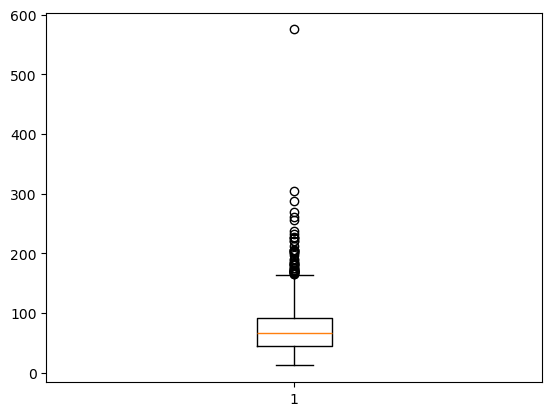

,ambient_humidity,baking_duration,cooling_period,cream_fat_content,egg_temperature,egg_yolk_count,final_temperature,lemon_zest_ph,origin,oven_temperature,preheating_time,salt_ratio,sugar_content,vanilla_extract,quality_class
id,,,,,,,,,,,,,,,
1272,52.0,23.0,23.0,93.7,575.0,10.0,722.0,3.5,Lisboa,713.0,187.0,48.45,29.1,6.5,KO


In [23]:
plt.boxplot(dataset_learn['egg_temperature'])
plt.show()
#i wanna see the row with the maximum egg temperature value
max_eggtemp = dataset_learn['egg_temperature'].max()
dataset_learn[dataset_learn['egg_temperature'] == max_eggtemp]

While analysing the outliers of the variable `Egg Temperature`, we verified there is an outlier, which is the maximum value, that not only has a really high value in this variable but also on `final_temperature`, `oven_temperature`. Therefore, we decided to drop this row.

In [24]:
dataset_learn.drop(index=1272, inplace=True) #this line drops the row


C:\Users\afons\AppData\Local\Temp\ipykernel_18000\3175555996.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_learn.drop(index=1272, inplace=True) #this line drops the row


### Egg Yolk Count

In [25]:
Q1_eggyolk = dataset_learn['egg_yolk_count'].quantile(0.25)
Q3_eggyolk = dataset_learn['egg_yolk_count'].quantile(0.75)
IQR_eggyolk = Q3_eggyolk - Q1_eggyolk
lower_bound_eggyolk = Q1_eggyolk - 1.5 * IQR_eggyolk
upper_bound_eggyolk = Q3_eggyolk + 1.5 * IQR_eggyolk
outliers = dataset_learn[(dataset_learn['egg_yolk_count'] < lower_bound_eggyolk) | (dataset_learn['egg_yolk_count'] > upper_bound_eggyolk)]
outliers


,ambient_humidity,baking_duration,cooling_period,cream_fat_content,egg_temperature,egg_yolk_count,final_temperature,lemon_zest_ph,origin,oven_temperature,preheating_time,salt_ratio,sugar_content,vanilla_extract,quality_class
id,,,,,,,,,,,,,,,
8,59.0,27.0,30.0,98.9,68.0,13.0,234.0,3.1,Lisboa,217.0,212.0,29.12,13.9,5.2,OK
65,42.0,23.0,29.0,98.0,117.0,13.0,255.0,3.4,Lisboa,241.0,177.0,24.10,21.8,6.6,OK
68,52.0,26.0,32.0,99.2,48.0,13.0,222.0,3.4,Lisboa,235.0,187.0,47.39,12.6,5.2,OK
128,60.0,38.0,19.0,99.6,40.0,13.0,112.0,3.6,Porto,126.0,182.0,81.24,24.5,7.0,OK
133,47.0,26.0,28.0,98.1,92.0,13.0,252.0,3.3,Lisboa,263.0,176.0,32.54,20.0,4.2,OK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5114,75.0,31.0,23.0,98.3,75.0,13.0,235.0,3.0,Lisboa,221.0,205.0,36.23,53.6,4.4,OK
5143,64.0,23.0,34.0,94.7,107.0,13.0,294.0,3.4,Lisboa,285.0,146.0,34.10,10.9,3.2,OK
5148,77.0,28.0,32.0,97.9,54.0,13.0,188.0,3.1,Lisboa,190.0,233.0,34.73,36.2,6.4,OK


In [26]:
dataset_learn.loc[dataset_learn['egg_yolk_count'] < lower_bound_eggyolk, 'egg_yolk_count'] = lower_bound_eggyolk    
dataset_learn.loc[dataset_learn['egg_yolk_count'] > upper_bound_eggyolk, 'egg_yolk_count'] = upper_bound_eggyolk

### Final Temperature

In [27]:
Q1_finaltemp = dataset_learn['final_temperature'].quantile(0.25)
Q3_finaltemp = dataset_learn['final_temperature'].quantile(0.75)
IQR_finaltemp = Q3_finaltemp - Q1_finaltemp
lower_bound_finaltemp = Q1_finaltemp - 1.5 * IQR_finaltemp
upper_bound_finaltemp = Q3_finaltemp + 1.5 * IQR_finaltemp

outliers = dataset_learn[(dataset_learn['final_temperature'] < lower_bound_finaltemp) | (dataset_learn['final_temperature'] > upper_bound_finaltemp)]
outliers

,ambient_humidity,baking_duration,cooling_period,cream_fat_content,egg_temperature,egg_yolk_count,final_temperature,lemon_zest_ph,origin,oven_temperature,preheating_time,salt_ratio,sugar_content,vanilla_extract,quality_class
id,,,,,,,,,,,,,,,
2107,60.0,25.0,60.0,98.8,85.0,12.5,468.0,3.0,Porto,470.0,230.0,53.40,82.4,5.3,OK
2640,77.0,25.0,60.0,102.2,86.0,12.0,484.0,3.0,Porto,483.0,224.0,49.78,84.2,5.0,OK
2828,65.0,30.0,22.0,98.4,67.0,9.0,498.0,3.4,Lisboa,504.0,203.0,83.82,59.1,5.6,KO
3142,65.0,23.0,24.0,101.1,287.0,10.0,486.0,3.5,Lisboa,470.0,178.0,39.84,16.8,5.4,KO
3347,77.0,21.0,57.0,94.6,113.0,9.0,477.0,3.0,Lisboa,479.0,298.0,63.46,161.4,5.3,KO
5025,43.0,33.0,22.0,102.1,304.0,11.0,512.0,3.3,Lisboa,512.0,213.0,47.32,20.0,3.8,KO
5039,48.0,37.0,35.0,100.1,82.0,10.0,611.0,3.0,Lisboa,603.0,255.0,58.60,152.2,6.3,KO


In [28]:
dataset_learn.loc[dataset_learn['final_temperature'] < lower_bound_finaltemp, 'final_temperature'] = lower_bound_finaltemp    
dataset_learn.loc[dataset_learn['final_temperature'] > upper_bound_finaltemp, 'final_temperature'] = upper_bound_finaltemp

### Lemon Zest Ph

In [29]:
Q1_lemon = dataset_learn['lemon_zest_ph'].quantile(0.25)
Q3_lemon = dataset_learn['lemon_zest_ph'].quantile(0.75)
IQR_lemon = Q3_lemon - Q1_lemon
lower_bound_lemon = Q1_lemon - 1.5 * IQR_lemon
upper_bound_lemon = Q3_lemon + 1.5 * IQR_lemon

outliers = dataset_learn[(dataset_learn['lemon_zest_ph'] < lower_bound_lemon) | (dataset_learn['lemon_zest_ph'] > upper_bound_lemon)]
outliers

,ambient_humidity,baking_duration,cooling_period,cream_fat_content,egg_temperature,egg_yolk_count,final_temperature,lemon_zest_ph,origin,oven_temperature,preheating_time,salt_ratio,sugar_content,vanilla_extract,quality_class
id,,,,,,,,,,,,,,,
30,49.0,21.0,27.0,103.2,100.0,9.0,314.0,2.7,Lisboa,296.0,299.0,34.63,141.0,4.5,OK
45,71.0,28.0,60.0,94.1,80.0,10.0,198.0,2.8,Lisboa,199.0,215.0,174.16,14.0,5.1,KO
52,41.0,19.0,44.0,99.1,51.0,10.0,214.0,2.8,Lisboa,204.0,254.0,52.17,20.8,4.7,KO
70,66.0,39.0,4.0,98.2,20.0,11.0,87.0,3.6,Porto,69.0,183.0,55.37,21.5,5.6,KO
128,60.0,38.0,19.0,99.6,40.0,12.5,112.0,3.6,Porto,126.0,182.0,81.24,24.5,7.0,OK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4984,51.0,20.0,38.0,97.3,30.0,11.0,112.0,2.8,Lisboa,109.0,216.0,24.16,59.2,5.1,KO
5042,51.0,21.0,29.0,93.4,34.0,11.0,140.0,2.8,Lisboa,130.0,290.0,36.97,11.7,4.5,KO
5081,50.0,25.0,23.0,100.1,95.0,9.0,343.0,3.6,Lisboa,358.0,199.0,60.56,12.9,4.9,KO


In [30]:
dataset_learn.loc[dataset_learn['lemon_zest_ph'] < lower_bound_lemon, 'lemon_zest_ph'] = lower_bound_lemon    
dataset_learn.loc[dataset_learn['lemon_zest_ph'] > upper_bound_lemon, 'lemon_zest_ph'] = upper_bound_lemon

### Oven Temperature

In [31]:
Q1_oventemp = dataset_learn['oven_temperature'].quantile(0.25)
Q3_oventemp = dataset_learn['oven_temperature'].quantile(0.75)
IQR_oventemp = Q3_oventemp - Q1_oventemp
lower_bound_oventemp = Q1_oventemp - 1.5 * IQR_oventemp
upper_bound_oventemp = Q3_oventemp + 1.5 * IQR_oventemp
outliers = dataset_learn[(dataset_learn['oven_temperature'] < lower_bound_oventemp) | (dataset_learn['oven_temperature'] > upper_bound_oventemp)]
outliers

,ambient_humidity,baking_duration,cooling_period,cream_fat_content,egg_temperature,egg_yolk_count,final_temperature,lemon_zest_ph,origin,oven_temperature,preheating_time,salt_ratio,sugar_content,vanilla_extract,quality_class
id,,,,,,,,,,,,,,,
2107,60.0,25.0,60.0,98.8,85.0,12.5,462.5,3.0,Porto,470.0,230.0,53.40,82.4,5.3,OK
2640,77.0,25.0,60.0,102.2,86.0,12.0,462.5,3.0,Porto,483.0,224.0,49.78,84.2,5.0,OK
2828,65.0,30.0,22.0,98.4,67.0,9.0,462.5,3.4,Lisboa,504.0,203.0,83.82,59.1,5.6,KO
3142,65.0,23.0,24.0,101.1,287.0,10.0,462.5,3.5,Lisboa,470.0,178.0,39.84,16.8,5.4,KO
3347,77.0,21.0,57.0,94.6,113.0,9.0,462.5,3.0,Lisboa,479.0,298.0,63.46,161.4,5.3,KO
5025,43.0,33.0,22.0,102.1,304.0,11.0,462.5,3.3,Lisboa,512.0,213.0,47.32,20.0,3.8,KO
5039,48.0,37.0,35.0,100.1,82.0,10.0,462.5,3.0,Lisboa,603.0,255.0,58.60,152.2,6.3,KO


In [32]:
dataset_learn.loc[dataset_learn['oven_temperature'] < lower_bound_oventemp, 'oven_temperature'] = lower_bound_oventemp    
dataset_learn.loc[dataset_learn['oven_temperature'] > upper_bound_oventemp, 'oven_temperature'] = upper_bound_oventemp

### Preheating Time Outliers Treatment

In [33]:
Q1_pretime = dataset_learn['preheating_time'].quantile(0.25)
Q3_pretime = dataset_learn['preheating_time'].quantile(0.75)
IQR_pretime = Q3_pretime - Q1_pretime
lower_bound_pretime = Q1_pretime - 1.5 * IQR_pretime
upper_bound_pretime = Q3_pretime + 1.5 * IQR_pretime
outliers = dataset_learn[(dataset_learn['preheating_time'] < lower_bound_pretime) | (dataset_learn['preheating_time'] > upper_bound_pretime)]
outliers

,ambient_humidity,baking_duration,cooling_period,cream_fat_content,egg_temperature,egg_yolk_count,final_temperature,lemon_zest_ph,origin,oven_temperature,preheating_time,salt_ratio,sugar_content,vanilla_extract,quality_class
id,,,,,,,,,,,,,,,
24,63.0,31.0,60.0,98.3,34.0,12.0,82.0,3.3,Porto,93.0,316.0,116.50,28.7,7.5,OK
30,49.0,21.0,27.0,103.2,100.0,9.0,314.0,2.8,Lisboa,296.0,299.0,34.63,141.0,4.5,OK
40,54.0,29.0,54.0,97.4,22.0,11.0,77.0,3.1,Porto,86.0,339.0,95.19,20.9,6.7,OK
57,66.0,29.0,40.0,97.8,22.0,9.0,71.0,3.1,Porto,75.0,341.0,88.29,23.5,7.6,KO
112,80.0,29.0,47.0,96.4,28.0,12.0,90.0,3.2,Porto,85.0,302.0,73.70,21.8,7.7,OK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5125,69.0,43.5,21.0,99.8,32.0,11.0,170.0,3.4,Porto,179.0,302.0,108.73,34.4,6.0,KO
5160,60.0,34.0,45.0,98.6,18.0,12.0,72.0,3.3,Porto,62.0,298.0,63.20,28.2,6.1,OK
5176,51.0,32.0,48.0,98.2,36.0,12.0,83.0,3.1,Porto,78.0,298.0,70.83,22.7,8.3,OK


In [34]:
dataset_learn.loc[dataset_learn['preheating_time'] < lower_bound_pretime, 'preheating_time'] = lower_bound_pretime   
dataset_learn.loc[dataset_learn['preheating_time'] > upper_bound_pretime, 'preheating_time'] = upper_bound_pretime

### Salt Ratio Outliers Treatment

In [35]:
Q1_salt = dataset_learn['salt_ratio'].quantile(0.25)
Q3_salt = dataset_learn['salt_ratio'].quantile(0.75)
IQR_salt = Q3_salt - Q1_salt
lower_bound_salt = Q1_salt - 1.5 * IQR_salt
upper_bound_salt = Q3_salt + 1.5 * IQR_salt
outliers = dataset_learn[(dataset_learn['salt_ratio'] < lower_bound_salt) | (dataset_learn['salt_ratio'] > upper_bound_salt)]
outliers

,ambient_humidity,baking_duration,cooling_period,cream_fat_content,egg_temperature,egg_yolk_count,final_temperature,lemon_zest_ph,origin,oven_temperature,preheating_time,salt_ratio,sugar_content,vanilla_extract,quality_class
id,,,,,,,,,,,,,,,
24,63.0,31.0,60.0,98.3,34.0,12.0,82.0,3.3,Porto,93.0,289.5,116.50,28.7,7.5,OK
32,50.0,19.0,47.0,97.1,137.0,9.0,270.0,3.1,Lisboa,279.0,197.0,195.82,39.8,3.8,KO
43,75.0,33.0,56.0,99.8,42.0,9.0,115.0,3.0,Porto,118.0,260.0,402.47,13.8,13.6,KO
45,71.0,28.0,60.0,94.1,80.0,10.0,198.0,2.8,Lisboa,199.0,215.0,174.16,14.0,5.1,KO
76,65.0,28.0,47.0,98.6,62.0,10.0,223.0,3.1,Lisboa,238.0,207.0,148.11,13.9,5.4,OK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5079,75.0,31.0,42.0,99.2,32.0,11.0,93.0,3.2,Porto,107.0,289.5,111.42,21.4,6.5,KO
5107,40.0,43.5,4.0,97.4,16.0,10.0,59.0,3.4,Porto,64.0,202.0,118.39,18.8,6.2,OK
5125,69.0,43.5,21.0,99.8,32.0,11.0,170.0,3.4,Porto,179.0,289.5,108.73,34.4,6.0,KO


In [36]:
dataset_learn.loc[dataset_learn['salt_ratio'] < lower_bound_salt, 'salt_ratio'] = lower_bound_salt   
dataset_learn.loc[dataset_learn['salt_ratio'] > upper_bound_salt, 'salt_ratio'] = upper_bound_salt

### Sugar Content Outliears Treatment

In [37]:
Q1_sugar = dataset_learn['sugar_content'].quantile(0.25)
Q3_sugar = dataset_learn['sugar_content'].quantile(0.75)
IQR_sugar = Q3_sugar - Q1_sugar
lower_bound_sugar = Q1_sugar - 1.5 * IQR_sugar
upper_bound_sugar = Q3_sugar + 1.5 * IQR_sugar
outliers = dataset_learn[(dataset_learn['sugar_content'] < lower_bound_sugar) | (dataset_learn['sugar_content'] > upper_bound_sugar)]
outliers

,ambient_humidity,baking_duration,cooling_period,cream_fat_content,egg_temperature,egg_yolk_count,final_temperature,lemon_zest_ph,origin,oven_temperature,preheating_time,salt_ratio,sugar_content,vanilla_extract,quality_class
id,,,,,,,,,,,,,,,
58,53.0,43.5,60.0,103.85,26.0,12.0,293.0,3.4,Lisboa,289.0,237.0,71.36,656.5,6.9,OK
91,63.0,24.0,54.0,96.90,118.0,10.0,353.0,3.1,Lisboa,354.0,217.0,45.97,174.4,5.1,OK
113,42.0,28.0,31.0,98.00,95.0,9.0,348.0,3.3,Lisboa,334.0,231.0,63.09,183.1,6.4,KO
177,74.0,18.0,60.0,95.70,149.0,9.0,367.0,3.1,Lisboa,366.0,232.0,49.54,176.4,5.0,OK
203,78.0,23.0,27.0,101.20,77.0,9.0,274.0,3.2,Lisboa,265.0,221.0,83.98,190.5,4.0,KO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4876,44.0,21.0,37.0,99.20,89.0,11.0,262.0,3.2,Lisboa,259.0,213.0,30.71,207.0,3.4,OK
5051,78.0,20.0,54.0,98.00,110.0,9.0,369.0,2.9,Lisboa,381.0,190.0,52.81,177.0,6.7,OK
5084,45.0,25.0,25.0,101.30,83.0,11.0,306.0,3.2,Lisboa,312.0,218.0,53.43,192.6,4.9,KO


In [38]:
dataset_learn.loc[dataset_learn['sugar_content'] < lower_bound_sugar, 'sugar_content'] = lower_bound_sugar   
dataset_learn.loc[dataset_learn['sugar_content'] > upper_bound_sugar, 'sugar_content'] = upper_bound_sugar

### Vanilla Extract Outliers Treatment

In [39]:
Q1_vanilla = dataset_learn['vanilla_extract'].quantile(0.25)
Q3_vanilla = dataset_learn['vanilla_extract'].quantile(0.75)
IQR_vanilla = Q3_vanilla - Q1_vanilla
lower_bound_vanilla = Q1_vanilla - 1.5 * IQR_vanilla
upper_bound_vanilla = Q3_vanilla + 1.5 * IQR_vanilla
outliers = dataset_learn[(dataset_learn['vanilla_extract'] < lower_bound_vanilla) | (dataset_learn['vanilla_extract'] > upper_bound_vanilla)]
outliers

,ambient_humidity,baking_duration,cooling_period,cream_fat_content,egg_temperature,egg_yolk_count,final_temperature,lemon_zest_ph,origin,oven_temperature,preheating_time,salt_ratio,sugar_content,vanilla_extract,quality_class
id,,,,,,,,,,,,,,,
43,75.0,33.0,56.0,99.8,42.0,9.0,115.0,3.0,Porto,118.0,260.0,104.50875,13.8,13.6,KO
66,72.0,17.0,40.0,97.2,122.0,10.0,254.0,3.3,Lisboa,253.0,218.0,50.41000,12.2,9.8,OK
124,56.0,19.0,43.0,98.3,86.0,11.0,165.0,3.3,Porto,150.0,236.0,52.34000,22.3,9.3,KO
142,48.0,23.0,48.0,97.4,23.0,11.0,79.0,3.2,Porto,86.0,289.5,77.46000,18.7,10.6,OK
196,70.0,24.0,36.0,100.8,100.0,10.0,163.0,3.5,Porto,152.0,273.0,72.57000,20.8,8.6,OK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5071,72.0,24.0,50.0,97.6,62.0,11.0,113.0,3.3,Porto,119.0,274.0,66.07000,18.1,10.4,OK
5113,49.0,42.0,60.0,95.1,22.0,12.5,91.0,3.1,Porto,87.0,289.5,90.81000,61.5,10.0,OK
5123,45.0,26.0,54.0,96.6,38.0,10.0,84.0,3.0,Porto,91.0,289.5,81.80000,21.7,9.1,OK


In [40]:
dataset_learn.loc[dataset_learn['vanilla_extract'] < lower_bound_vanilla, 'vanilla_extract'] = lower_bound_vanilla       
dataset_learn.loc[dataset_learn['vanilla_extract'] > upper_bound_vanilla, 'vanilla_extract'] = upper_bound_vanilla

### **2.6. Transforming Quality Class into a Binary Variable**

The target variable `quality_class` is categorical ('OK' or 'KO'). To better prepare the data for the binary classification models (which is the case), it is necessary to transform it into a binary variable, which means either '0' or '1'.

We decided to attribute:
- **1** for "OK", the Pastel de Nata is in a good state.
- **0** for "KO", you should not eat the Pastel de Nata.

The "OK" class is positive and is the one that will be predicted.

In [ ]:
dataset_learn['quality_class_binary'] = dataset_learn['quality_class'].map({'OK': 1, 'KO': 0})
dataset_learn.drop(['quality_class'], axis = 1, inplace = True)

#I think we should use this one now
#le = LabelEncoder()
#df['y'] = le.fit_transform(df['target'])

C:\Users\afons\AppData\Local\Temp\ipykernel_18000\1506606720.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_learn['quality_class_binary'] = dataset_learn['quality_class'].map({'OK': 1, 'KO': 0})
C:\Users\afons\AppData\Local\Temp\ipykernel_18000\1506606720.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_learn.drop(['quality_class'], axis = 1, inplace = True)


In [42]:
dataset_learn[['quality_class_binary']].head()

,quality_class_binary
id,
1,0
2,0
3,1
4,1
5,0


In [43]:
dataset_learn['quality_class_binary'].value_counts()

quality_class_binary
1    3301
0    1895
Name: count, dtype: int64

now we need to export the final dataset for us to be able to work with it on the next notebook(feature engineering)

In [44]:
dataset_learn.to_csv('datasetlearn_cleaned.csv')

meter aqui ganda conclusão final